<a href="https://colab.research.google.com/github/narvitp/Data-Analyst-Course/blob/main/Copy_of_HW_11_1_%D0%92%D1%96%D0%B7%D1%83%D0%B0%D0%BB%D1%96%D0%B7%D0%B0%D1%86%D1%96%D1%8F_%D0%B4%D0%B0%D0%BD%D0%B8%D1%85_%D0%B7_Pandas_ipynb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Домашнє завдання: Візуалізація даних з Pandas

## Опис завдання
У цьому домашньому завданні ви працюватимете з датасетом про оренду велосипедів `yulu_rental.csv`. Датасет містить інформацію про кількість орендованих велосипедів залежно від погодних умов, сезону та інших факторів.
Набір даних взяти з Kaggle. Посилання на оригінальний [опис](https://www.kaggle.com/datasets/ranitsarkar01/yulu-bike-sharing-data?select=yulu_bike_sharing_dataset.csv).

**Опис колонок:**
- `datetime` - дата та час
- `season` - сезон (1=весна, 2=літо, 3=осінь, 4=зима)
- `holiday` - чи є день святковим (0=ні, 1=так)
- `workingday` - чи є день робочим (0=ні, 1=так)
- `weather` - погодні умови (1=ясно, 2=туман, 3=легкий дощ, 4=сильний дощ)
- `temp` - температура в градусах Цельсія
- `atemp` - відчувається як температура
- `humidity` - вологість (%)
- `windspeed` - швидкість вітру
- `casual` - кількість випадкових користувачів
- `registered` - кількість зареєстрованих користувачів
- `count` - загальна кількість орендованих велосипедів

## Підготовка даних


In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd
import matplotlib.pyplot as plt

# Завантаження даних
df = pd.read_csv('/content/drive/MyDrive/Course/Data/yulu_rental.csv')

In [3]:
# Перетворення datetime у правильний формат
df['datetime'] = pd.to_datetime(df['datetime'])
df.set_index('datetime', inplace=True)

# Додамо додаткові колонки для аналізу
df['date'] = df.index.date
df['day'] = df.index.day
df['week'] = df.index.isocalendar().week
df['weekday_num'] = df.index.weekday
df['weekday'] = df.index.day_name()
df['year'] = df.index.year
df['month'] = df.index.month
df['hour'] = df.index.hour

## Завдання 0: Перегляд даних
**Завдання:**
Перегляньте дані, їх розмір, та напишіть висновок:
- скільки даних в наборі
- який рівень деталізації мають ці дані, тобто за який період міститься дані в одному рядку даних ?

In [4]:
df.shape

(10886, 19)

In [5]:
f'У нашому датафреймі є {df.shape[0]} рядків та {df.shape[1]} колонок'

'У нашому датафреймі є 10886 рядків та 19 колонок'

In [6]:
df.head(-1)

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,date,day,week,weekday_num,weekday,year,month,hour
datetime,,,,,,,,,,,,,,,,,,,
2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0000,3,13,16,2011-01-01,1,52,5,Saturday,2011,1,0
2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0000,8,32,40,2011-01-01,1,52,5,Saturday,2011,1,1
2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0000,5,27,32,2011-01-01,1,52,5,Saturday,2011,1,2
2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0000,3,10,13,2011-01-01,1,52,5,Saturday,2011,1,3
2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0000,0,1,1,2011-01-01,1,52,5,Saturday,2011,1,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2012-12-19 18:00:00,4,0,1,1,15.58,19.695,50,23.9994,23,546,569,2012-12-19,19,51,2,Wednesday,2012,12,18
2012-12-19 19:00:00,4,0,1,1,15.58,19.695,50,26.0027,7,329,336,2012-12-19,19,51,2,Wednesday,2012,12,19
2012-12-19 20:00:00,4,0,1,1,14.76,17.425,57,15.0013,10,231,241,2012-12-19,19,51,2,Wednesday,2012,12,20


У нас рівень деталізації такий: рік > місяць > день > година

## Завдання 1: Базовий лінійний графік

**Завдання:**
1. Згрупуйте дані про кількість орендованих велосипедів (`count`) поденно.
2. Побудуйте з методом `DataFrame.plot()` лінійний графік поденної кількості орендованих велосипедів (`count`) за весь період в даних.
3. Налаштуйте розмір графіка (12x6), додайте заголовок "Динаміка оренди велосипедів" та сітку.
4. Дайте відповіді на питання по цьому графіку. Якщо треба - проведіть додаткові програмні операції для відповідей.

**Питання для інтерпретації:**
1. Як гадаєте, чому графік має "заломи", чим це спричинено і як ви б могли прибрати заломи?
2. Які загальні тенденції ви бачите на графіку?
3. Чи помітні якісь сезонні коливання?
4. Чи є періоди з аномально високими або низькими значеннями і чому на ваш погляд можуть бути ці аномалії?


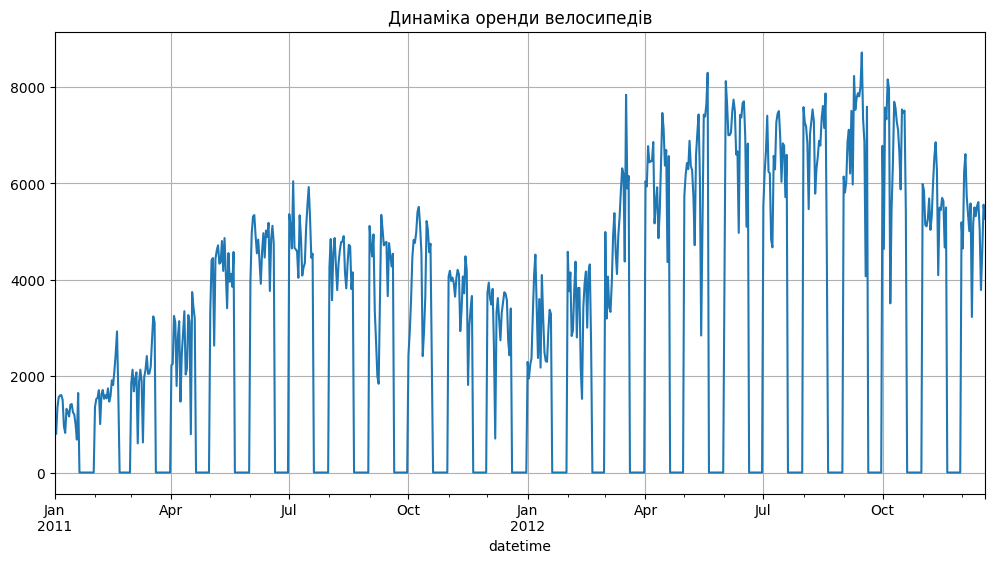

In [7]:
df_day_count = df['count'].resample('D').sum()
df_day_count.plot(
    figsize=(12, 6),
    title='Динаміка оренди велосипедів',
    grid = True
)
plt.show()

1. Як гадаєте, чому графік має "заломи", чим це спричинено і як ви б могли прибрати заломи?  
  *Якщо згрупувати дані по дням продажу, то ми побачимо, що кожного місяця остіннім днем продажів був 19-й день місяця, після чого дані були відсутні. Це є підозріло, що відсутні дані щодо продажів у настіпні дні поточних місяців.*
 2.  Які загальні тенденції ви бачите на графіку?  
 *Ми бачимо зріст продажів протягом усього часу продажів, що свідчить що наж продукт має позитивний ріст.*
3.  Чи помітні якісь сезонні коливання?  
*На графіку видно чіткі сезонні зміни. Із Січня місяця щороку починається ріст який продовжується до Вересня, після чого знову іде спад*
4. Чи є періоди з аномально високими або низькими значеннями і чому на ваш погляд можуть бути ці аномалії?  
*Ми бачимо, що у деякі дні є різкі знидення кіськості покупок велосипедів. Це може бути пов'язані із різними факторами, які поки по графіку неможливо визначити, але можливо через свята чи робочі/вихідні дні, також можливо через погодні умови*


## Завдання 2: Аналіз сезонності (Bar Plot)

**Завдання:**
Побудуйте вертикальну стовпчасту діаграму середньої кількості орендованих велосипедів за сезонами. Додайте підписи осей і заголовок.

Просунуте доповнення:
1. Позначте сезони не числом, а назвою на візуалізації.
2. Додайте підписи над стовпцями зі значеннями в кожному стовпці.

Дайте відповіді на питання нижче.

**Питання для інтерпретації:**
1. В який сезон найбільша середня кількість оренди велосипедів?
2. Як ви можете пояснити таку сезонну закономірність?
3. У скільки разів відрізняється оренда між найпопулярнішим та найменш популярним сезоном?

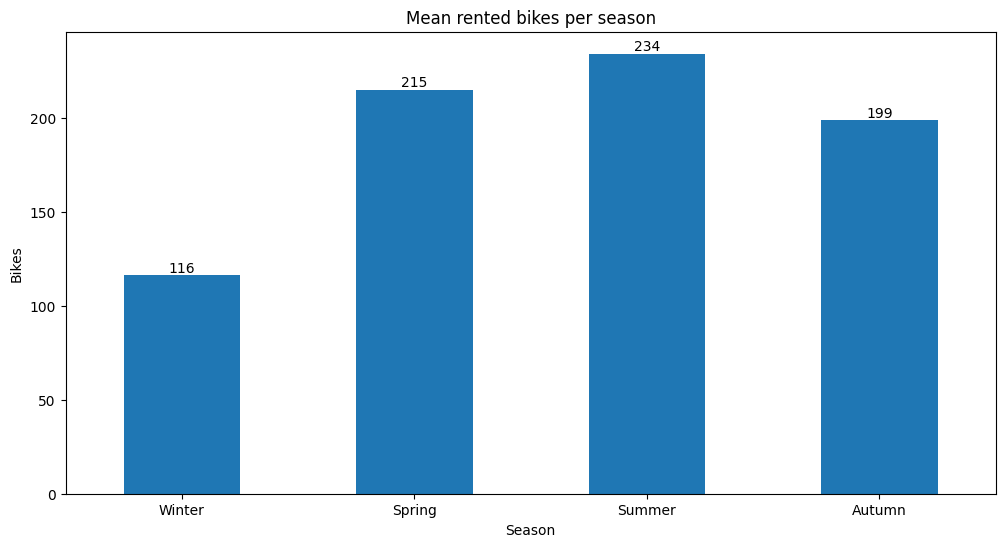

In [8]:

seasons_sales = df.groupby('season')['count'].mean()
seasons_sales_bar =seasons_sales.plot.bar(
    title='Mean rented bikes per season',
    figsize=(12, 6),
    xlabel = 'Season',
    ylabel = 'Bikes',

)
for x in seasons_sales_bar.patches:
    value = x.get_height()
    seasons_sales_bar.text(
        x.get_x() + x.get_width() / 2,
        value,
        f'{value:.0f}',
        ha='center',
        va='bottom'
    )

seasons_sales_bar.set_xticklabels(['Winter', 'Spring', 'Summer', 'Autumn'])
plt.xticks(rotation=0)
plt.show()

Найбільше велосипедів було продано влітку. Сезонність наших покупок обумовлена порами року та тим, що попит взимку на на них значно нижчі. Взимку це спричинено погодними умовами, при кращих наші продажі ростуть і відповідно влітку вони найвищі.Майжу у два рази середні продажі більші влітку ніж взимку.

## Завдання 3: Динаміка за місяцями (Line Plot)

**Завдання:**
Створіть лінійний графік середньої кількості оренди велосипедів по місяцях (тобто групування в рамках місяця і беремо середню кількість оренд в цей місяць з кількох років). Використайте маркери-кружечки для точок, додайте сітку та пофарбуйте лінію у червоний колір.

Просунуте доповнення:
- додайте аби по осі ОХ поділки були чітко на кожен окремий місяць по одній. Тобто сумарно 12 поділок.

Дайте відповіді на питання нижче.

**Питання для інтерпретації:**
1. В які місяці спостерігається пік та спад оренди?
2. Чи збігається ця закономірність з результатами з попереднього завдання?
3. Як може вплинути клімат на оренду велосипедів протягом року?


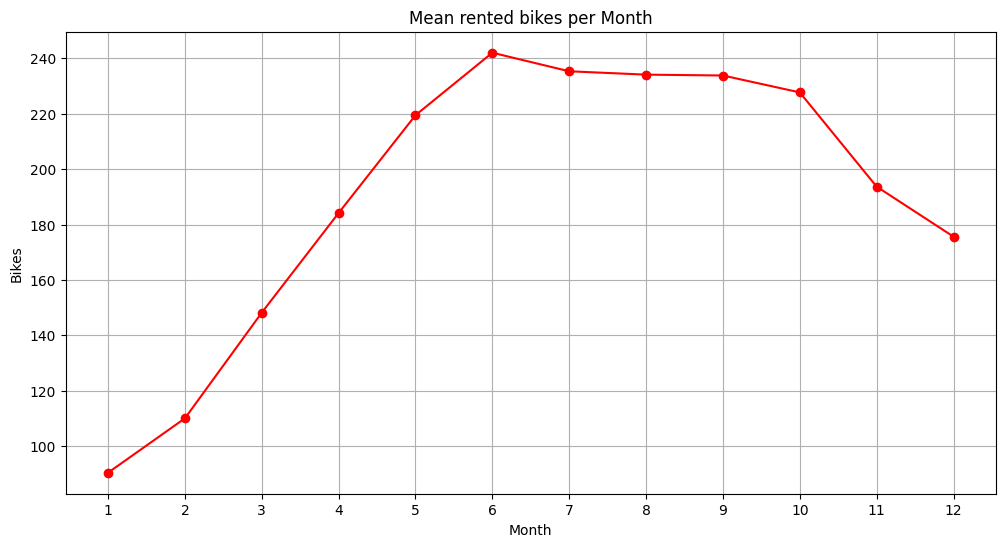

In [9]:
sales_mon = df.groupby('month')['count'].mean()
sales_mon_line = sales_mon.plot.line(
    figsize=(12, 6),
    title='Mean rented bikes per Month',
    grid = True,
    marker = 'o',
    color = 'red',
    xlabel = 'Month',
    ylabel = 'Bikes'
)
plt.xticks(range(1, 13))
plt.show()

Пік у нас спостерігаєтся на 6-му цісяці (Червень), в найнижчий першого місяця (Січень).
Ми бачимо явну закономірність між графіками середні оренд по місяцям та сезонам, дані одного підтверджують дані іншого, що є логічним у нашій ситуації.


## Завдання 4: Розподіл погодних умов (Pie Chart)

**Завдання:**
1. Побудуйте кругову діаграму з часткою записів за погодними умовами
2. Додайте підписи з відсотками та легенду з описами погоди (1=ясно, 2=туман, 3=легкий дощ, 4=сильний дощ).
3. Визначте свої відмінні від стандартних кольори для відображення кожної категорії.
4. Дайте відповіді на питання нижче.

**Питання для інтерпретації:**
1. Яка погода переважає в датасеті?
2. Чи є дні із сильним дощем? Яка їх частка?
3. Як ви думаєте, як погодні умови впливають на попит на оренду велосипедів?

Очікуваний результат:

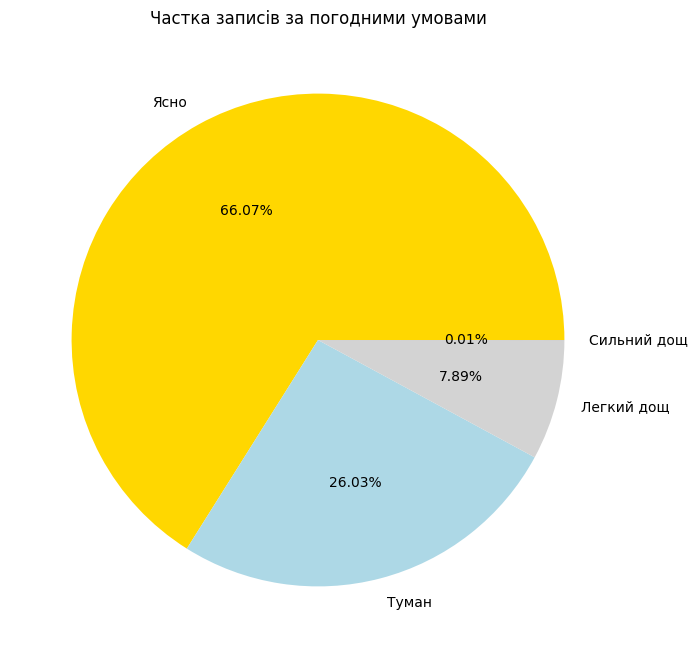

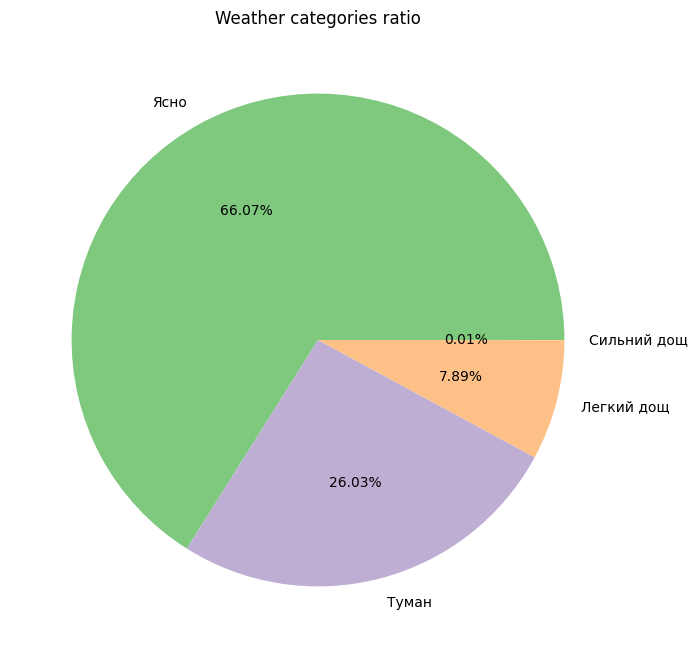

In [10]:
weather_count = df.groupby('weather')['weather'].count()
weather_count.plot.pie(
    figsize=(8, 8),
    autopct='%1.2f%%',
    labels= ['Ясно', 'Туман', 'Легкий дощ', 'Сильний дощ'],
    title='Weather categories ratio',
    ylabel='',
    colors=plt.cm.Accent.colors
)
plt.show()

## Завдання 5: Box Plot для аналізу викидів

**Завдання:**
Створіть коробковий графік (box plot) кількості орендованих велосипедів для кожного типу погоди.

Просунуте доповнення:
- Використайте горизонтальну орієнтацію.
- Позначте погодні умови не числом, а назвою на візуалізації.

Дайте відповіді на питання нижче.

**Питання для інтерпретації:**
1. При якій погоді найбільший розкид у кількості оренди?
2. Чи є викиди (outliers) в даних? При якій погоді?
3. При якій погоді медіанне значення оренди найвище?

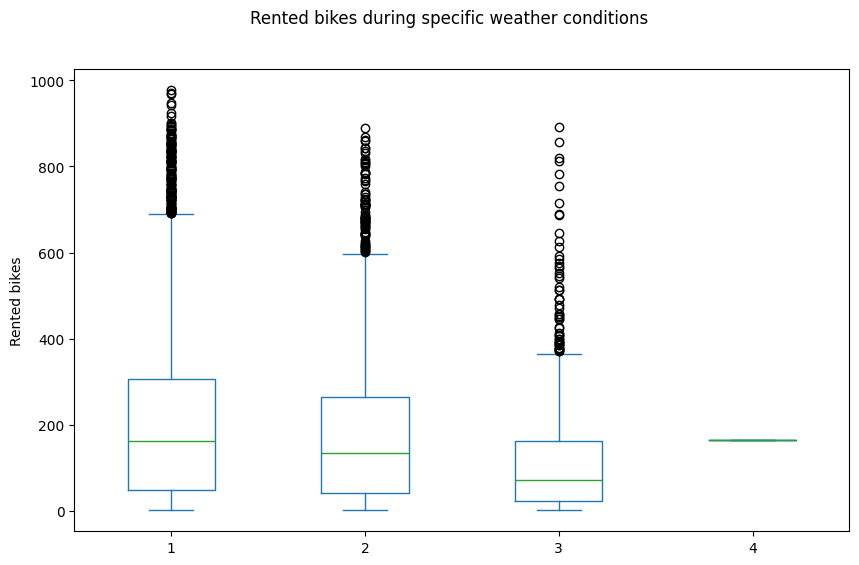

In [11]:

df[['count', 'weather']].plot.box(
    by='weather',
    figsize=(10, 6),
    title='Rented bikes during specific weather conditions',
    ylabel='Rented bikes'
)
plt.title('')
#bikes_per_weather.set_xticklabels(['Sunny', 'Fog', 'Lite rain', 'Strong rain'])
plt.show()

Найбільше розкидів у першому (Сонячно).
Видиди спостерігаються у першомому, другому та третьому випадках.
Значення медіани вище в першому варіанті для сонячної погоди.

*У мене не вийшло додати назви умов замість цифр методом set_xticklabels, хоча знаю, що можна додати категороіальну колонку і тоді все буле легко, але саме цим не зміг.*

## Завдання 6: Кореляція температури та оренди (Scatter Plot)

**Завдання:**
Побудуйте діаграму розсіювання залежності між температурою (`temp`) та загальною кількістю оренди (`count`). Розфарбуйте точки за сезонами, додайте напівпрозорість (alpha=0.6).

Дайте відповіді на питання нижче.

**Питання для інтерпретації:**
- Чи є зв'язок між температурою та кількістю оренди? Який?

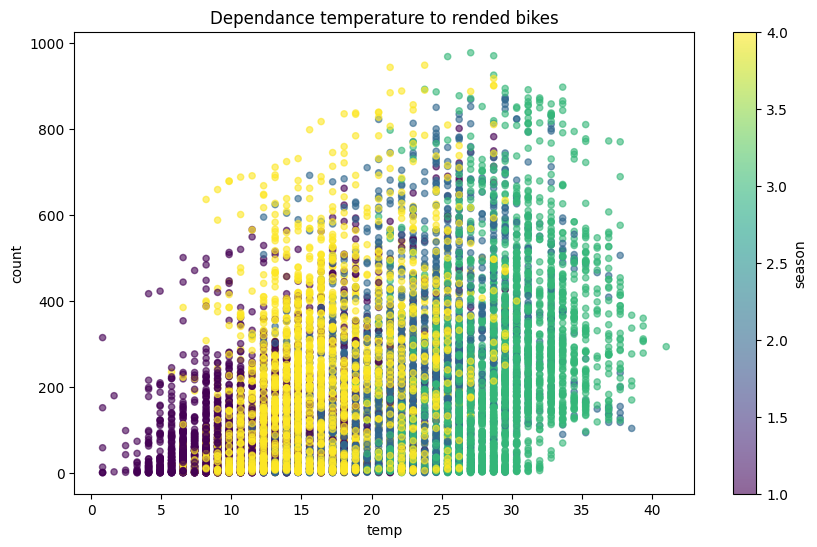

In [12]:
df.plot.scatter(
    x='temp',
    y='count',
    c='season',
    colormap='viridis',
    title='Dependance temperature to rended bikes',
    figsize=(10, 6),
    alpha=0.6
)
plt.show()

На графіку прослідковується позитивна залежність кількості продажів від температури - чим більша температура тим вищі продаджі, але десь після 35 градусів продажі починають падати і залежність стає негативною.

## (Опціонально) Завдання 7: Порівняння користувачів (Stacked Bar Chart)

**Завдання:**
Ми хочемо дізнатись як по дням тижня беруть в середньому в оренду велосипеди випадкові і зареєстровані користувачі.

Створіть стовпчасту діаграму з накопиченням (bar з налаштуванням `stacked=True`), яка показує співвідношення випадкових (`casual`) та зареєстрованих (`registered`) користувачів по днях тижня за кількістю взятих ними велосипедів в оренду в середньому. Використайте різні кольори для типів користувачів.

Дайте відповіді на питання нижче.

**Питання для інтерпретації:**
1. В які дні тижня більше оренд від зареєстрованих користувачів?
2. Як ви можете пояснити таку різницю в поведінці користувачів протягом тижня?

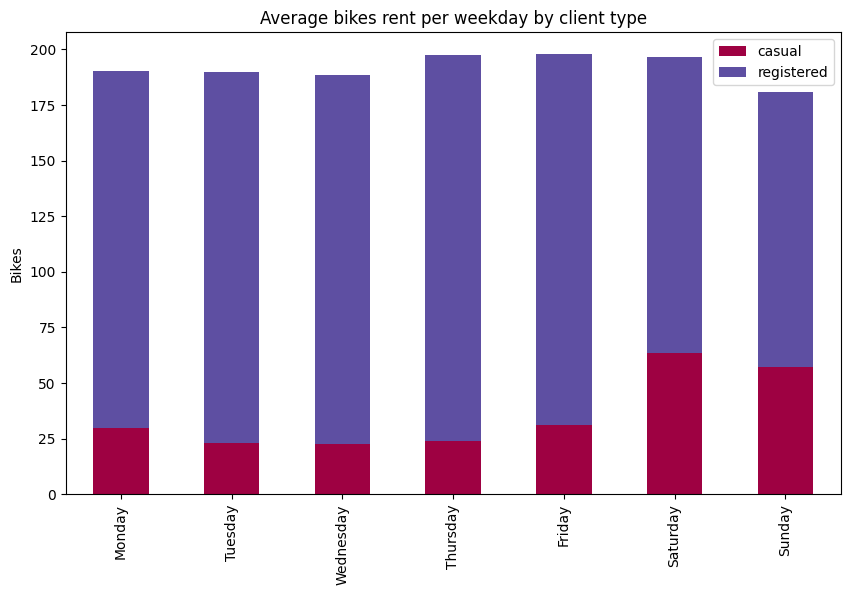

In [38]:
#визначаємо наперед порядок сортування днів тижня
ordered_days = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

#міняємо тип нашої колонки на категоріальну із відсортованим порядком
df['weekday'] = pd.Categorical(df['weekday'], categories=ordered_days, ordered=True)

weeksday_grouped = df.groupby('weekday', observed=False)[['casual', 'registered']].mean()

weeksday_grouped.plot.bar(
    stacked=True,
    figsize=(10, 6),
    title='Average bikes rent per weekday by client type',
    colormap='Spectral',
    ylabel = 'Bikes',
    xlabel = " "
)
plt.show()

Найбільше оренд по зареєстрованих покупцям в середньому відбувалась у Вівторок, Середу та Четвер. Можу припустити, що посеред тижня більше оренд відбувається від покупців які вже знайомі із продуктом, тобто ті які уже оримували наші послуги. В інші дні, що в основному є вихідними, коли збільшуються к-сті оренд від випадкових покупців, обумовлений тим, що люди у вихідні дні більше купують та більше пробують якісь нові продукти. Тому серед тижня значно більше орендують ті що уже знають продукт, а на вихідних ті хто шукає щось нове та пробує інші сервіси.